In [1]:
from qiskit import IBMQ


IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

/Users/lambertkong/opt/anaconda3/envs/tket/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [2]:
from pytket import Circuit, Qubit, Bit
from sympy import symbols
from pytket.circuit.display import render_circuit_jupyter


In [3]:
ansatz = Circuit()
qubits = ansatz.add_q_register("q", 4)
args = symbols("a0 a1 a2 a3 a4 a5 a6 a7")
for i in range(4):
    ansatz.Ry(args[i], qubits[i])
for i in range(3):
    ansatz.CX(qubits[i], qubits[i + 1])
for i in range(4):
    ansatz.Ry(args[4 + i], qubits[i])
    
    
for i in range(4):
    ansatz.Ry(args[i], qubits[i])
for i in range(3):
    ansatz.CX(qubits[i], qubits[i + 1])
for i in range(4):
    ansatz.Ry(args[4 + i], qubits[i])
    

ansatz.measure_all()

[Ry(a0) q[0]; Ry(a1) q[1]; Ry(a2) q[2]; Ry(a3) q[3]; CX q[0], q[1]; Ry(a4) q[0]; CX q[1], q[2]; Ry(a0) q[0]; Ry(a5) q[1]; CX q[2], q[3]; Ry(a1) q[1]; Ry(a6) q[2]; Ry(a7) q[3]; CX q[0], q[1]; Ry(a2) q[2]; Ry(a3) q[3]; Ry(a4) q[0]; CX q[1], q[2]; Measure q[0] --> c[0]; Ry(a5) q[1]; CX q[2], q[3]; Measure q[1] --> c[1]; Ry(a6) q[2]; Ry(a7) q[3]; Measure q[2] --> c[2]; Measure q[3] --> c[3]; ]

In [4]:
render_circuit_jupyter(ansatz)

In [5]:
for command in ansatz:
    print(command)

Ry(a0) q[0];
Ry(a1) q[1];
Ry(a2) q[2];
Ry(a3) q[3];
CX q[0], q[1];
Ry(a4) q[0];
CX q[1], q[2];
Ry(a0) q[0];
Ry(a5) q[1];
CX q[2], q[3];
Ry(a1) q[1];
Ry(a6) q[2];
Ry(a7) q[3];
CX q[0], q[1];
Ry(a2) q[2];
Ry(a3) q[3];
Ry(a4) q[0];
CX q[1], q[2];
Measure q[0] --> c[0];
Ry(a5) q[1];
CX q[2], q[3];
Measure q[1] --> c[1];
Ry(a6) q[2];
Ry(a7) q[3];
Measure q[2] --> c[2];
Measure q[3] --> c[3];


In [6]:
arg_values = [
    7.17996183e-02,
    2.95442468e-08,
    1.00000015e00,
    1.00000086e00,
    9.99999826e-01,
    1.00000002e00,
    9.99999954e-01,
    1.13489747e-06,
    7.17996183e-02,
    2.95442468e-08,
    1.00000015e00,
    1.00000086e00,
    9.99999826e-01,
    1.00000002e00,
    9.99999954e-01,
    1.13489747e-06,
    7.17996183e-02,
    2.95442468e-08,
    1.00000015e00,
    1.00000086e00,
    9.99999826e-01,
    1.00000002e00,
    9.99999954e-01,
    1.13489747e-06,
]

In [7]:
ansatz.symbol_substitution(dict(zip(args, arg_values)))

In [8]:
import openfermion as of

In [9]:
hamiltonian = (
     
- 0.096022 * of.QubitOperator("Z0")
- 0.206128 * of.QubitOperator("Z0 Z1")
+ 0.364746 * of.QubitOperator("Z1")
+ 0.096022 * of.QubitOperator("Z2")
- 0.206128 * of.QubitOperator("Z2 Z3")
- 0.364746 * of.QubitOperator("Z3")
- 0.145438 * of.QubitOperator("Z0 Z2")
+ 0.056040 * of.QubitOperator("Z0 Z2 Z3")
+ 0.110811 * of.QubitOperator("Z0 Z3")
- 0.056040 * of.QubitOperator("Z0 Z1 Z2")
+ 0.080334 * of.QubitOperator("Z0 Z1 Z2 Z3")
+ 0.063673 * of.QubitOperator("Z0 Z1 Z3")
+ 0.110811 * of.QubitOperator("Z1 Z2")
- 0.063673 * of.QubitOperator("Z1 Z2 Z3")
- 0.095216 * of.QubitOperator("Z1 Z3")
#2nd column
- 0.012585 * of.QubitOperator("X0 Z1")
+ 0.012585 * of.QubitOperator("X0")
+ 0.012585 * of.QubitOperator("X2 Z3")
+ 0.012585 * of.QubitOperator("X2")
- 0.002667 * of.QubitOperator("X0 Z1 X2 Z3")
- 0.002667 * of.QubitOperator("X0 Z1 X2")
+ 0.002667 * of.QubitOperator("X0 X2 Z3")
+ 0.002667 * of.QubitOperator("X0 X2")
+ 0.007265 * of.QubitOperator("X0 Z1 Z3")
- 0.007265 * of.QubitOperator("X0 Z3")
+ 0.007265 * of.QubitOperator("Z1 X2 Z3")
+ 0.007265 * of.QubitOperator("Z1 X2")
    
#3rd column
- 0.029640 * of.QubitOperator("X0 X1")
+ 0.002792 * of.QubitOperator("X1")
- 0.029640 * of.QubitOperator("X2 X3") 
+ 0.002792 * of.QubitOperator("X3")
- 0.008195 * of.QubitOperator("X0 X2 X3")
- 0.001271 * of.QubitOperator("X0 X3") 
- 0.008195 * of.QubitOperator("X0 X1 X2")
+ 0.028926 * of.QubitOperator("X0 X1 X2 X3")
+ 0.007499 * of.QubitOperator("X0 X1 X3")    
- 0.001271 * of.QubitOperator("X1 X2")
+ 0.007499 * of.QubitOperator("X1 X2 X3")
+ 0.009327 * of.QubitOperator("X1 X3")
    
#4th column
+ 0.029640 * of.QubitOperator("Y0 Y1")
+ 0.029640 * of.QubitOperator("Y2 Y3")
+ 0.028926 * of.QubitOperator("Y0 Y1 Y2 Y3")
    
#5th column
+ 0.002792 * of.QubitOperator("Z0 X1")
- 0.002792 * of.QubitOperator("Z2 X3")
- 0.016781 * of.QubitOperator("Z0 Z2 X3")
+ 0.016781 * of.QubitOperator("Z0 X3")
- 0.016781 * of.QubitOperator("Z0 X1 Z2")
- 0.016781 * of.QubitOperator("X1 Z2") 
- 0.009327 * of.QubitOperator("Z0 X1 Z2 X3")
+ 0.009327 * of.QubitOperator("Z0 X1 X3")
- 0.009327 * of.QubitOperator("X1 Z2 X3")
    
#6th column
- 0.011962 * of.QubitOperator("Z0 X2 Z3")
- 0.011962 * of.QubitOperator("Z0 X2")
+ 0.000247 * of.QubitOperator("Z0 Z1 X2 Z3")
+ 0.000247 * of.QubitOperator("Z0 Z1 X2")

#7th column
+ 0.039155 * of.QubitOperator("Z0 X2 X3")
- 0.002895 * of.QubitOperator("Z0 Z1 X2 X3")
- 0.009769 * of.QubitOperator("Z0 Z1 X3")
- 0.024280 * of.QubitOperator("Z1 X2 X3")
- 0.008025 * of.QubitOperator("Z1 X3")    

#8th column
- 0.039155 * of.QubitOperator("Z0 Y2 Y3")
+ 0.002895 * of.QubitOperator("Z0 Z1 Y2 Y3")
+ 0.024280 * of.QubitOperator("Z1 Y2 Y3")  
    
#9th column
- 0.011962 * of.QubitOperator("X0 Z1 Z2")
+ 0.011962 * of.QubitOperator("X0 Z2")
- 0.000247 * of.QubitOperator("X0 Z1 Z2 Z3")
+ 0.000247 * of.QubitOperator("X0 Z2 Z3")



#2nd row
+ 0.008195 * of.QubitOperator("X0 Z1 X2 X3")
+ 0.001271 * of.QubitOperator("X0 Z1 X3")
    
- 0.008195 * of.QubitOperator("X0 Z1 Y2 Y3")
+ 0.008195 * of.QubitOperator("X0 Y2 Y3")
    
- 0.001271 * of.QubitOperator("X0 Z1 Z2 X3")
+ 0.001271 * of.QubitOperator("X0 Z2 X3")
+ 0.008025 * of.QubitOperator("Z1 Z2 X3")
    
- 0.039155 * of.QubitOperator("X0 X1 Z2")
- 0.002895 * of.QubitOperator("X0 X1 Z2 Z3")
+ 0.024280 * of.QubitOperator("X0 X1 Z3")
- 0.009769 * of.QubitOperator("X1 Z2 Z3")
+ 0.008025 * of.QubitOperator("X1 Z3")
    
+ 0.039155 * of.QubitOperator("Y0 Y1 Z2")
+ 0.002895 * of.QubitOperator("Y0 Y1 Z2 Z3")
- 0.024280 * of.QubitOperator("Y0 Y1 Z3")
    
- 0.008195 * of.QubitOperator("X0 X1 X2 Z3")
- 0.001271 * of.QubitOperator("X1 X2 Z3")
    
+ 0.008195 * of.QubitOperator("Y0 Y1 X2 Z3")
+ 0.008195 * of.QubitOperator("Y0 Y1 X2")
    
- 0.028926 * of.QubitOperator("X0 X1 Y2 Y3")
- 0.007499 * of.QubitOperator("X1 Y2 Y3")
    
- 0.028926 * of.QubitOperator("Y0 Y1 X2 X3")
- 0.007499 * of.QubitOperator("Y0 Y1 X3")
    
#third row
- 0.007499  * of.QubitOperator("X0 X1 Z2 X3")

+ 0.007499  * of.QubitOperator("Y0 Y1 Z2 X3")

+ 0.009769  * of.QubitOperator("Z0 Z1 Z2 X3")

- 0.001271 * of.QubitOperator("Z0 X1 X2 Z3")
- 0.001271 * of.QubitOperator("Z0 X1 X2")
+ 0.008025 * of.QubitOperator("Z0 X1 Z3")

+ 0.007499 * of.QubitOperator("Z0 X1 X2 X3")

- 0.007499 * of.QubitOperator("Z0 X1 Y2 Y3")

- 0.009769 * of.QubitOperator("Z0 X1 Z2 Z3")

)

In [10]:
from pytket.pauli import Pauli, QubitPauliString
from pytket.utils.operators import QubitPauliOperator

In [11]:
pauli_sym = {"I": Pauli.I, "X": Pauli.X, "Y": Pauli.Y, "Z": Pauli.Z}

In [12]:
def qps_from_openfermion(paulis):
    """Convert OpenFermion tensor of Paulis to pytket QubitPauliString."""
    qlist = []
    plist = []
    for q, p in paulis:
        qlist.append(Qubit(q))
        plist.append(pauli_sym[p])
    return QubitPauliString(qlist, plist)

In [13]:
def qpo_from_openfermion(openf_op):
    """Convert OpenFermion QubitOperator to pytket QubitPauliOperator."""
    tk_op = dict()
    for term, coeff in openf_op.terms.items():
        string = qps_from_openfermion(term)
        tk_op[string] = coeff
    return QubitPauliOperator(tk_op)

In [14]:
hamiltonian_op = qpo_from_openfermion(hamiltonian)

In [15]:
syn = Qubit("synq", 0)
syn_res = Bit("synres", 0)
ansatz.add_qubit(syn)
ansatz.add_bit(syn_res)
for qb in qubits:
    ansatz.CX(qb, syn)
ansatz.Measure(syn, syn_res)

[Ry(0.0717996) q[0]; Ry(2.95442e-08) q[1]; Ry(1) q[2]; Ry(1) q[3]; CX q[0], q[1]; Ry(1) q[0]; CX q[1], q[2]; Ry(0.0717996) q[0]; Ry(1) q[1]; CX q[2], q[3]; Ry(2.95442e-08) q[1]; Ry(1) q[2]; Ry(1.1349e-06) q[3]; CX q[0], q[1]; Ry(1) q[2]; Ry(1) q[3]; Ry(1) q[0]; CX q[1], q[2]; Measure q[0] --> c[0]; Ry(1) q[1]; CX q[2], q[3]; Measure q[1] --> c[1]; CX q[0], synq[0]; Ry(1) q[2]; Ry(1.1349e-06) q[3]; Measure q[2] --> c[2]; Measure q[3] --> c[3]; CX q[1], synq[0]; CX q[2], synq[0]; CX q[3], synq[0]; Measure synq[0] --> synres[0]; ]

In [16]:
def filter_shots(backend_result, syn_res_bit):
    bits = sorted(backend_result.get_bitlist())
    bits.remove(syn_res_bit)
    syn_shots = backend_result.get_shots([syn_res])[:, 0]
    main_shots = backend_result.get_shots(bits)
    return main_shots[syn_shots == 0]
    filtered_rows = shot_table[shot_table[:, syn_res_index] == 0]
    return np.delete(filtered_rows, syn_res_index, axis=1)

In [17]:
from pytket.passes import OptimisePhaseGadgets, SequencePass

In [18]:
def compiler_pass(backend):
    return SequencePass([OptimisePhaseGadgets(), backend.default_compilation_pass()])

In [19]:
from pytket.predicates import CompilationUnit
from pytket.utils import append_pauli_measurement

In [20]:
def gen_pauli_measurement_circuits(state_circuit, compiler_pass, operator):
    # compile main circuit once
    state_cu = CompilationUnit(state_circuit)
    compiler_pass.apply(state_cu)
    compiled_state = state_cu.circuit
    final_map = state_cu.final_map
    # make a measurement circuit for each pauli
    pauli_circuits = []
    coeffs = []
    energy = 0
    for p, c in operator.terms.items():
        if p == ():
            # constant term
            energy += c
        else:
            # make measurement circuits and compile them
            pauli_circ = Circuit(state_circuit.n_qubits - 1)  # ignore syndrome qubit
            append_pauli_measurement(qps_from_openfermion(p), pauli_circ)
            pauli_cu = CompilationUnit(pauli_circ)
            compiler_pass.apply(pauli_cu)
            pauli_circ = pauli_cu.circuit
            init_map = pauli_cu.initial_map
            # map measurements onto the placed qubits from the state
            rename_map = {
                i: final_map[o] for o, i in init_map.items() if o in final_map
            }
            pauli_circ.rename_units(rename_map)
            state_and_measure = compiled_state.copy()
            state_and_measure.append(pauli_circ)
            pauli_circuits.append(state_and_measure)
            coeffs.append(c)
    return pauli_circuits, coeffs, energy

In [21]:
from pytket.utils import expectation_from_shots

In [22]:
def expectation_value(state_circuit, operator, backend, n_shots):
    if backend.supports_expectation:
        circuit = state_circuit.copy()
        compiled_circuit = backend.get_compiled_circuit(circuit)
        return backend.get_operator_expectation_value(
            compiled_circuit, qpo_from_openfermion(operator)
        )
    elif backend.supports_shots:
        syn_res_index = state_circuit.bit_readout[syn_res]
        pauli_circuits, coeffs, energy = gen_pauli_measurement_circuits(
            state_circuit, compiler_pass(backend), operator
        )
        handles = backend.process_circuits(pauli_circuits, n_shots=n_shots)
        for handle, coeff in zip(handles, coeffs):
            res = backend.get_result(handle)
            filtered = filter_shots(res, syn_res)
            energy += coeff * expectation_from_shots(filtered)
            backend.pop_result(handle)
        return energy
    else:
        raise NotImplementedError("Implementation for state and counts to be written")

In [23]:
from pytket.extensions.qiskit import IBMQEmulatorBackend, AerBackend

In [24]:
import numpy as np

z = np.array([[1, 0],
              [0, -1]], dtype=complex)

y = np.array([[0, -1j],
              [1j, 0]], dtype=complex)

x = np.array([[0, 1],
              [1, 0]], dtype=complex)

I = np.array([[1, 0],
              [0, 1]], dtype=complex)

def tensor4(a, b, c, d):
    return np.kron(np.kron(np.kron(a, b), c), d)

Hamiltonian = -0.0970662681676282*tensor4(I, I, I, I) - 0.045302615503799284 * tensor4(x, x, y, y) \
+ 0.045302615503799284 * tensor4(x, y, y, x) + 0.045302615503799284 * tensor4(y, x, x, y) \
- 0.045302615503799284 * tensor4(y, y, x, x) + 0.17141282644776884 * tensor4(z, I, I, I) \
+ 0.16868898170361213 * tensor4(z, z, I, I) + 0.12062523483390425 * tensor4(z, I, z, I) \
+ 0.16592785033770352 * tensor4(z, I, I, z) + 0.17141282644776884 * tensor4(I, z, I, I) \
+ 0.16592785033770352 * tensor4(I, z, z, I) + 0.12062523483390425 * tensor4(I, z, I, z) \
- 0.22343153690813597 * tensor4(I, I, z, I) + 0.17441287612261608 * tensor4(I, I, z, z) \
-0.22343153690813597 * tensor4(I, I, I, z)

from scipy.linalg import eig
print(min(eig(Hamiltonian)[0]))

(-1.1372838344885008+0j)


In [30]:
def vqeCost(arg):
    ansatz = Circuit()
    qubits = ansatz.add_q_register("q", 4)
    symstring = ['a' + str(x) for x in range(24)]
    args = symbols(symstring)
    for i in range(4):
        ansatz.Rz(args[3*i], qubits[i])
        ansatz.Rx(args[3*i+1], qubits[i])
        ansatz.Rz(args[3*i+2], qubits[i])
    ansatz.CX(qubits[0], qubits[2])
    ansatz.CX(qubits[1], qubits[0])
    ansatz.CX(qubits[1], qubits[3])
    for i in range(4):
        ansatz.Rz(args[3*i+12], qubits[i])
        ansatz.Rx(args[3*i+13], qubits[i])
        ansatz.Rz(args[3*i+14], qubits[i])
    ansatz.measure_all()

    ansatz.symbol_substitution(dict(zip(args, arg)))
    ansatz.rename_units({Qubit("synq", 0): Qubit("q", 4)})
    energy = expectation_value(ansatz, hamiltonian, AerBackend(), 8000)
    costfunc.append(energy)
    print(energy)
    return energy

In [31]:
arg_values = [
    7.17996183e-02,
    2.95442468e-08,
    1.00000015e00,
    1.00000086e00,
    9.99999826e-01,
    1.00000002e00,
    9.99999954e-01,
    1.13489747e-06,
    7.17996183e-02,
    2.95442468e-08,
    1.00000015e00,
    1.00000086e00,
    9.99999826e-01,
    1.00000002e00,
    9.99999954e-01,
    1.13489747e-06,
    7.17996183e-02,
    2.95442468e-08,
    1.00000015e00,
    1.00000086e00,
    9.99999826e-01,
    1.00000002e00,
    9.99999954e-01,
    1.13489747e-06,
]

vqeCost(arg_values)

-0.09065235546875015


-0.09065235546875015

In [27]:
from scipy.optimize import dual_annealing

In [28]:
costfunc = []
 
results = dual_annealing(vqeCost, x0=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                     bounds=([-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]
                             , [-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi],
                            [-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]
                             , [-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi],
                            [-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]
                             , [-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]), maxiter=400)



-0.350954000000001
0.5134450097656258
0.31340001953125
0.0643952617187499
-0.295318337890625
0.3098005625
-0.04465493359374998
-0.2522654218750002
-0.2795817128906254
-0.06910406640625004
-0.14518451171875002
0.16573207617187496
0.3560674804687498
-0.14683436914062503
-0.09868386914062509
-0.6424938535156239
0.05935272265625
-0.10113103515625003
0.452784107421875
0.3789344902343754
0.03397328125000003
-0.10355709179687506
-0.13788109960937503
-0.03516612499999998
-0.03453635351562506
-0.044801410156250006
-0.017003179687500054
-0.0406594316406251
-0.04556640234375003
-0.3977487011718754
-0.4091936582031253
-0.39014057812500036
-0.31411887304687547
-0.35117937695312507
-0.31338275585937486
-0.2874400468749999
-0.3202777343750002
-0.33117103124999986
-0.14820123242187508
-0.205789111328125
-0.22572775390625
0.3856866699218746
0.3570040937499998
0.10313749414062498
0.25402122070312505
0.29638979101562496
0.09128253320312506
0.7388466601562502
0.7031531054687503
-0.6460922929687489
-0.6345

In [29]:
results

     fun: -0.835072
 message: ['Maximum number of iteration reached']
    nfev: 34426
    nhev: 0
     nit: 400
    njev: 609
  status: 0
 success: True
       x: array([ 1.62916221, -1.00633668, -2.26436941, -1.54114133,  0.99648002,
        0.42667319,  1.64751161,  1.1121034 , -0.71265652, -3.0919432 ,
        2.42827733,  0.59116761,  1.33778645,  2.98337889, -3.00215077,
        1.04160417, -2.0077279 ,  2.13870062,  1.23360878, -2.10829099,
        1.98640617,  0.59517701,  0.57722927,  0.47711314])

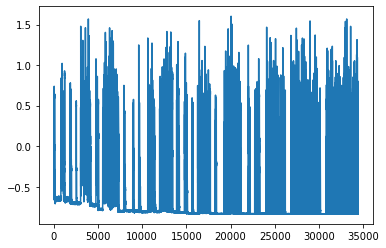

In [32]:
import matplotlib.pyplot as plt
plt.plot(costfunc)